# **Import Library**

Pertama kita perlu mengimpor beberapa library seperti pandas untuk proses data, matplotlib untuk visualisasi, dll.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn untuk visualisasi
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# **Load Dataset**

Mengakses dataset dari google drive. Dataset yang akan digunakan hanya 1000 data saja.

In [75]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/melb_data.csv'
data = pd.read_csv(file_path)

df_limited = data.head(1000)  # Ambil 1000 data/ baris saja
data = df_limited.dropna()    # Menghapus baris dengan missing value

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


# **EDA (Exploratory Data Analysis) dan Data Preparation**

Pada tahap ini akan melakukan berbagai macam data process seperti cek missing values, mencari outlier, dan mulivariate analysis.

Tidak ada missing values dalam dataset.
Jumlah outlier: 542
Jumlah outlier sesudah dihapus: 523


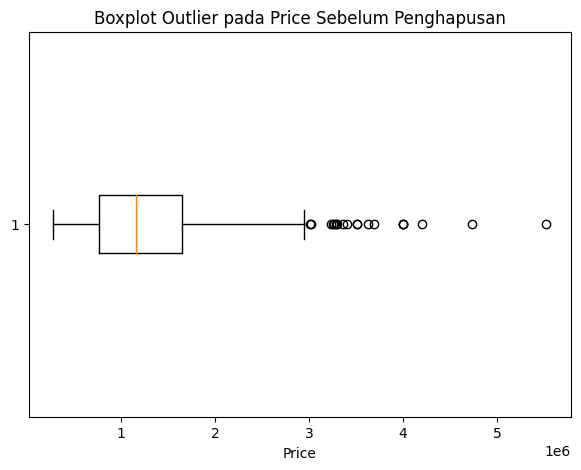

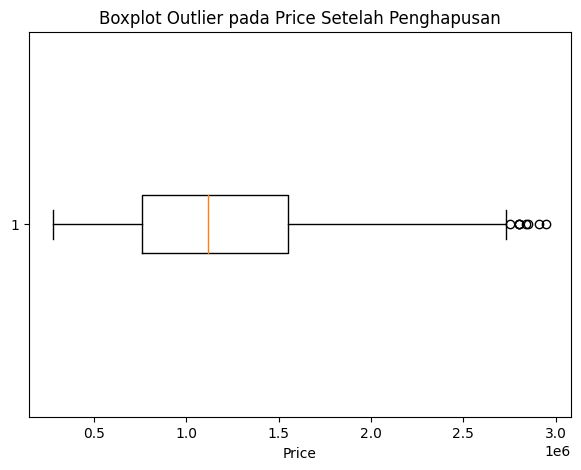

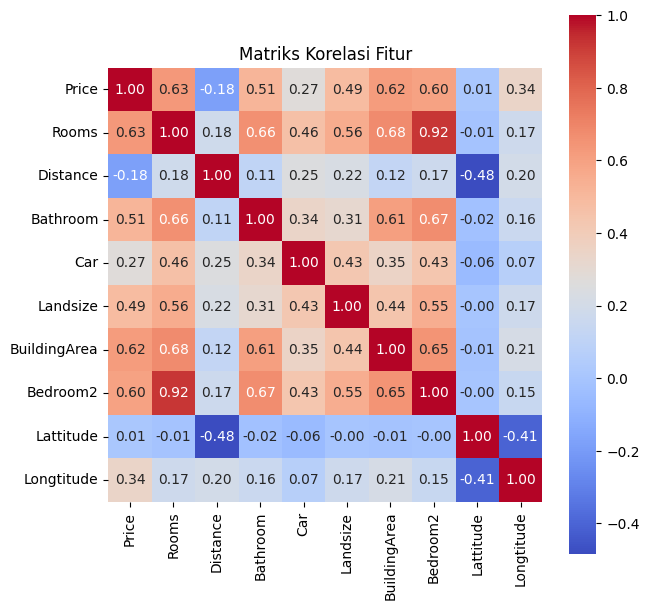

In [76]:
# Exploratory Data Analysis (EDA)
# Check for missing values
has_missing_values = data.isnull().values.any()

if has_missing_values:
    print("Ada missing values dalam dataset.")
else:
    print("Tidak ada missing values dalam dataset.")

# Deteksi outlier menggunakan IQR pada fitur 'Price'
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier dari data
dataIQR = data
data = data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]

# Tampilkan jumlah outlier dan outlier yang dihapus
print(f"Jumlah outlier: {dataIQR.shape[0]}")
print(f"Jumlah outlier sesudah dihapus: {data.shape[0]}")

# Visualisasi outlier
plt.figure(figsize=(7, 5))
plt.boxplot(dataIQR['Price'], vert=False)
plt.title('Boxplot Outlier pada Price Sebelum Penghapusan')
plt.xlabel('Price')
plt.show()

# Visualisasi outlier
plt.figure(figsize=(7, 5))
plt.boxplot(data['Price'], vert=False)
plt.title('Boxplot Outlier pada Price Setelah Penghapusan')
plt.xlabel('Price')
plt.show()

# Analisis Matriks Korelasi
# Pilih subset fitur untuk analisis korelasi
features_subset = ['Price', 'Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Bedroom2', 'Lattitude', 'Longtitude']
correlation_matrix = data[features_subset].corr()

# Visualisasikan matriks korelasi
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi Fitur')
plt.show()

# **Modelling dan Evaluasi**

Pada Tahap terakhir ini merupakan pembuatan model dimana akan melakukan preprrocessing data terlebih dahulu dilanjut dengan menggunakan salah satu model regresi populer yaitu Random Forest. Setelah melakukan modelling, akan melakukan evaluasi dengan mencari nilai R2 score dimana lebih mendekati 1 memiliki arti bahwa model lebih bagus dan tentu saja visualisasi hasil prediksi model tersebut.

Random Forest R2 Score: 0.7795457483456163


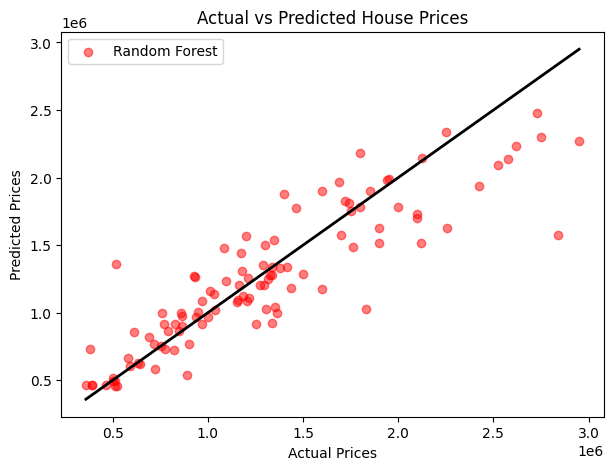

In [77]:
# Pilih fitur untuk regresi
features = ['Rooms', 'Distance', 'Bathroom', 'Bedroom2', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude']
X = data[features]
y = data['Price']

# Scaling fitur menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Evaluasi model dengan R2 score
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest R2 Score: {r2_rf}")

# Plot actual vs predicted values House Prices
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()